 Dataset link: https://archive.ics.uci.edu/ml/datasets/Abalone

In [49]:
'''
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years
'''

'\nSex / nominal / -- / M, F, and I (infant)\nLength / continuous / mm / Longest shell measurement\nDiameter / continuous / mm / perpendicular to length\nHeight / continuous / mm / with meat in shell\nWhole weight / continuous / grams / whole abalone\nShucked weight / continuous / grams / weight of meat\nViscera weight / continuous / grams / gut weight (after bleeding)\nShell weight / continuous / grams / after being dried\nRings / integer / -- / +1.5 gives the age in years\n'

## Importing Data 

In [50]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None)

In [51]:
df.columns= ['Sex','Length',"Diameter",
                  "Height","Whole_weight",
                  'Shucked_weight','Viscera_weight','Shell_weight','Rings']

## Exploratory Data Analysis

In [52]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [53]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [55]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [56]:
import seaborn as sns

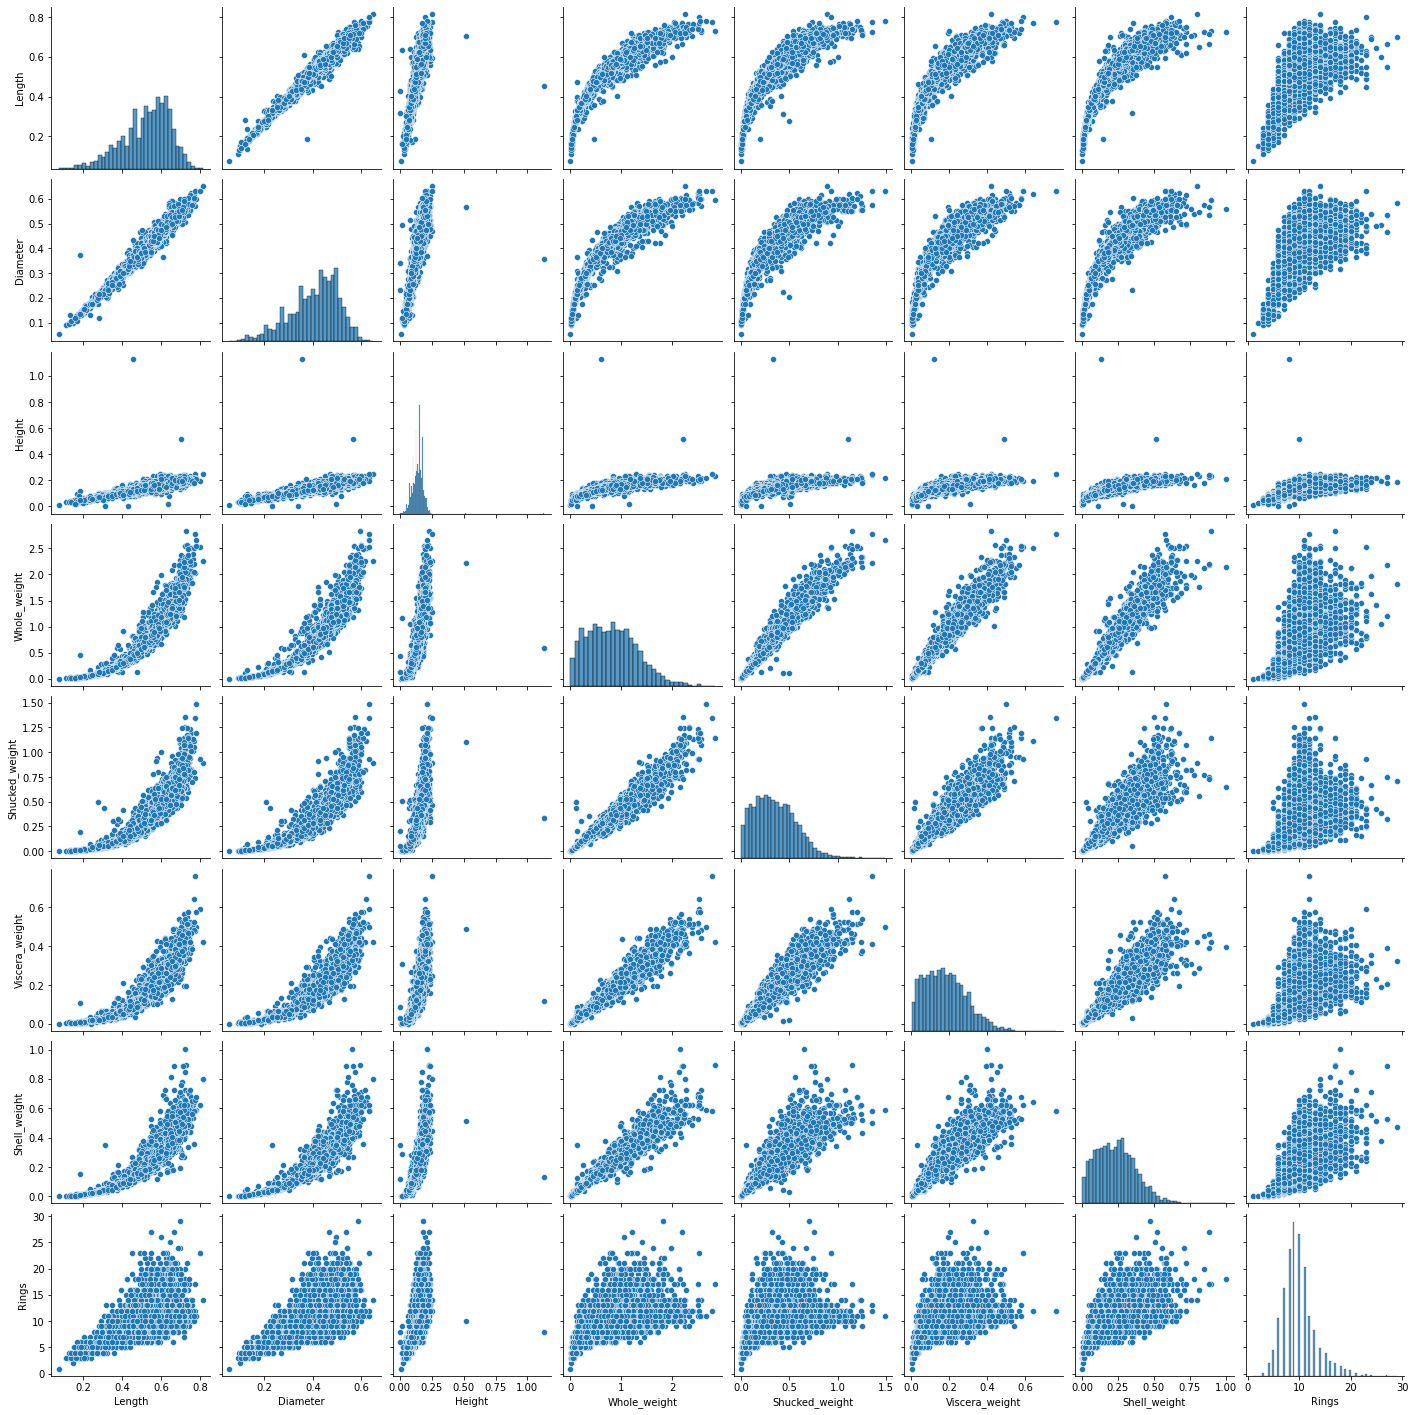

In [57]:
sns.pairplot(df.drop(["Sex"],axis=1))

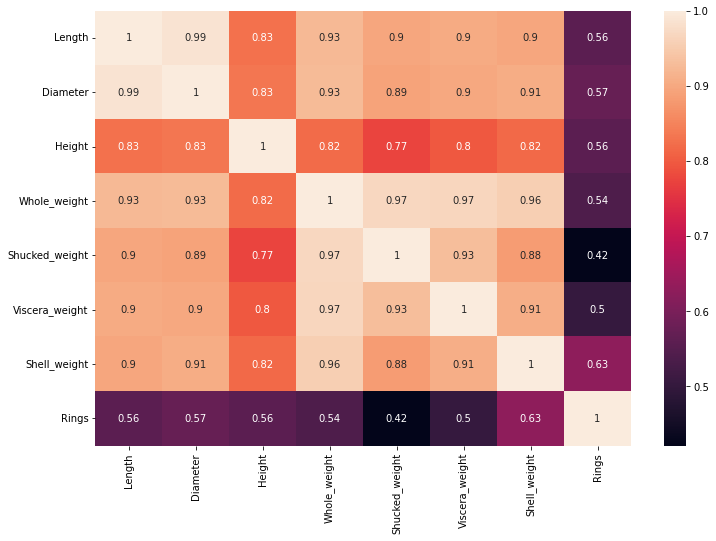

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

sns.heatmap(df.drop(["Sex"],axis=1).corr(),annot=True)

In [59]:
df['Sex'] = df['Sex'].map({'M':0, 'F':1,"I":2})


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.drop(['Rings'],axis=1).columns

In [62]:
vif_data["VIF"] = [variance_inflation_factor(df.drop(['Rings'],axis=1).values, i)
                          for i in range(len(df.drop(['Rings'],axis=1).columns))]
  
print(vif_data)

          feature         VIF
0             Sex    2.682127
1          Length  719.817749
2        Diameter  752.844073
3          Height   42.118898
4    Whole_weight  422.411121
5  Shucked_weight  101.614374
6  Viscera_weight   63.677159
7    Shell_weight   81.901274


In [63]:
X = df.drop(['Rings','Length','Diameter'],axis=1)
y = df['Rings']

### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
X_scaled = StandardScaler().fit_transform(X)

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = 7)

In [69]:
model.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)

In [71]:
from sklearn import metrics

In [72]:
print("R2 Score  of Linear Regression: ",metrics.r2_score(y_test,y_pred))

R2 Score  of Linear Regression:  0.5309341419778508


### PCA and Linear Regression

In [73]:
from sklearn.decomposition import PCA


In [74]:
pca = PCA(n_components = 0.99)

In [75]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [76]:
explained_variance = pca.explained_variance_ratio_

In [77]:
explained_variance

array([0.79695705, 0.11975854, 0.05226461, 0.01954898, 0.01035546])

In [78]:
model = LinearRegression()

In [79]:
model.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test)

In [81]:
print("R2 Score  of Linear Regression after PCA : ",metrics.r2_score(y_test,y_pred))

R2 Score  of Linear Regression after PCA :  0.519470155580914


### Ridge Regression

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = 7)

In [83]:
from sklearn.linear_model import Ridge

In [84]:
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [85]:
print("R2 Score  of Ridge Regression : ",metrics.r2_score(y_test,y_pred))

R2 Score  of Ridge Regression :  0.5308932838528876


### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [88]:
print("R2 Score  of Decision Tree : ",metrics.r2_score(y_test,y_pred))

R2 Score  of Decision Tree :  0.19667121652221553


### Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
model = RandomForestRegressor(random_state=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [91]:
print("R2 Score  of Random Forest : ",metrics.r2_score(y_test,y_pred))

R2 Score  of Random Forest :  0.5566895815569186


### Support Vector Regressor

In [92]:
from sklearn import svm

In [93]:
reg = svm.SVR()

reg.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [94]:
print("R2 Score  of Support Vector Regressor : ",metrics.r2_score(y_test,y_pred))

R2 Score  of Support Vector Regressor :  0.5566895815569186


### KNeighbors Regressor

In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
reg = KNeighborsRegressor()

reg.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [97]:
print("R2 Score  of KNeighbors Regression : ",metrics.r2_score(y_test,y_pred))

R2 Score  of KNeighbors Regression :  0.5566895815569186
